In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from DG_functions import *

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
# user defined parameters
u = 2   # velocity
Tf = 0.025  # final time
ax = -1; 
bx = 1
sigma = 1/8
#qinit = lambda x: np.exp(-(x/(2*sigma))**2)
qinit = lambda x : sin(2*pi*x)

def bc(t):
    return qinit(ax-u*t), qinit(bx-u*t)
    

# function f(q(x,t)) = u*q(x,t)

f = lambda q: u*q
a = 0.1

#N = 2
#Ne = 100
#Q = N+1
#Np = Ne*(N+1)

neL = -1
neR =  1
diss = 1

In [17]:
# Order of polynomials

Order = [4]#,3,4,6]

# list of the number of elements
NE = array([4])#10,20,40,80])
l = len(NE)

error_list = []

for N in Order:     
    Q = N+1    
    
    xe2 = array(Lobatto_p(N))  # Lobatto point mesh
    xe = xe2[::-1]

    # array that contains the error for each iteration
    Error = zeros(l)
    for ne in range(l):

        Ne = NE[ne]
        Np = Ne*(N+1)

        # space stuff
        
        x = zeros(Np)
        xel = linspace(-1,1,Ne+1)
        xe2 = array(Lobatto_p(N))
        xe = xe2[::-1]
        for e in range(1,Ne+1):
            ae=xel[e-1] ; be=xel[e]

            xsi=((be-ae)/2)*(xe-1) + be

            for i in range(0,N+1):
                ip=intmaDG(e,N)[i]
                x[ip]=xsi[i]


        dx = (bx-ax)/(Np-1)   # for second order

        fixed_dt = True
        if (fixed_dt):
            dx0 = (bx-ax)/(NE[0]*N)
            dtest = a*dx0/np.abs(u)
            N0 = int(Tf//dtest)+1    # Number of time steps
            dt0 = Tf/N0

            h = log2(dx0/dx)
            dt = dt0/2**h
            Nt = int(N0*2**h)
        else:        
            dtest = a*dx/np.abs(u)
            Nt = int(Tf//dtest)+1    # Number of time steps
            dt = Tf/Nt

        print('N = {:d}, time_step(Nt = {:d})'.format(N,Nt))

        t = linspace(0, Tf, Nt+1)

        q = SolverDG(Np,N,Ne,u,diss,f,Nt, x,t,dt,bc,qinit,ax,bx)
        
        # exact solution
        q_exact = qinit(x-u*t[Nt])
        #error
        error = abs(q-q_exact)
        Error[ne] = max(error)
        
    error_list.append((N,Error))

N = 4, time_step(Nt = 5)
Elemental Mass Matrix
[[ 0.04444444  0.01296296 -0.01481481  0.01296296 -0.00555556]
 [ 0.01296296  0.24197531  0.0345679  -0.03024691  0.01296296]
 [-0.01481481  0.0345679   0.31604938  0.0345679  -0.01481481]
 [ 0.01296296 -0.03024691  0.0345679   0.24197531  0.01296296]
 [-0.00555556  0.01296296 -0.01481481  0.01296296  0.04444444]]
Elemental Differentiation Matrix
[[-5.00000000e-01 -6.75650249e-01  2.66666667e-01 -1.41016418e-01
   5.00000000e-02]
 [ 6.75650249e-01  4.83563806e-16 -9.50460144e-01  4.15826313e-01
  -1.41016418e-01]
 [-2.66666667e-01  9.50460144e-01 -1.57898386e-16 -9.50460144e-01
   2.66666667e-01]
 [ 1.41016418e-01 -4.15826313e-01  9.50460144e-01 -4.83563806e-16
  -6.75650249e-01]
 [-5.00000000e-02  1.41016418e-01 -2.66666667e-01  6.75650249e-01
   5.00000000e-01]]
Elemental Flux Matrix
[[-1. -0.  0. -0.  0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]


<IPython.core.display.Javascript object>


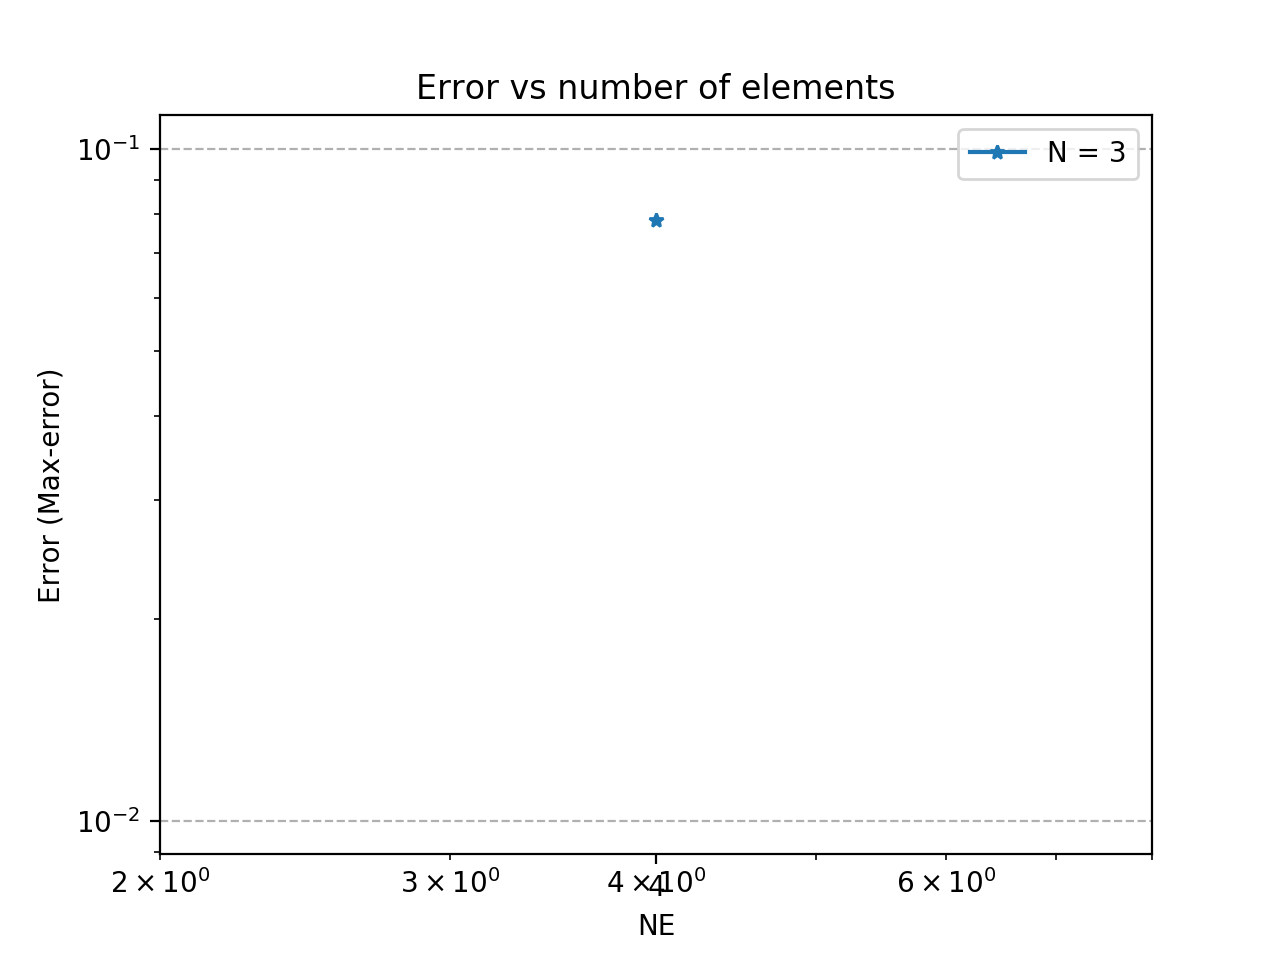

In [12]:
import cg_graphics

figure(1)
clf()
    
for e in error_list:
    N = e[0]
    Error = e[1]        
    loglog(NE, Error,'-*',markersize=5, label = 'N = {}'.format(N))

xlabel('NE')
ylabel('Error (Max-error)')
title('Error vs number of elements')
cg_graphics.set_xticks(NE)  # Create nice tick marks for NE
legend()
grid(axis='y',linestyle='--')
show()

<IPython.core.display.Javascript object>


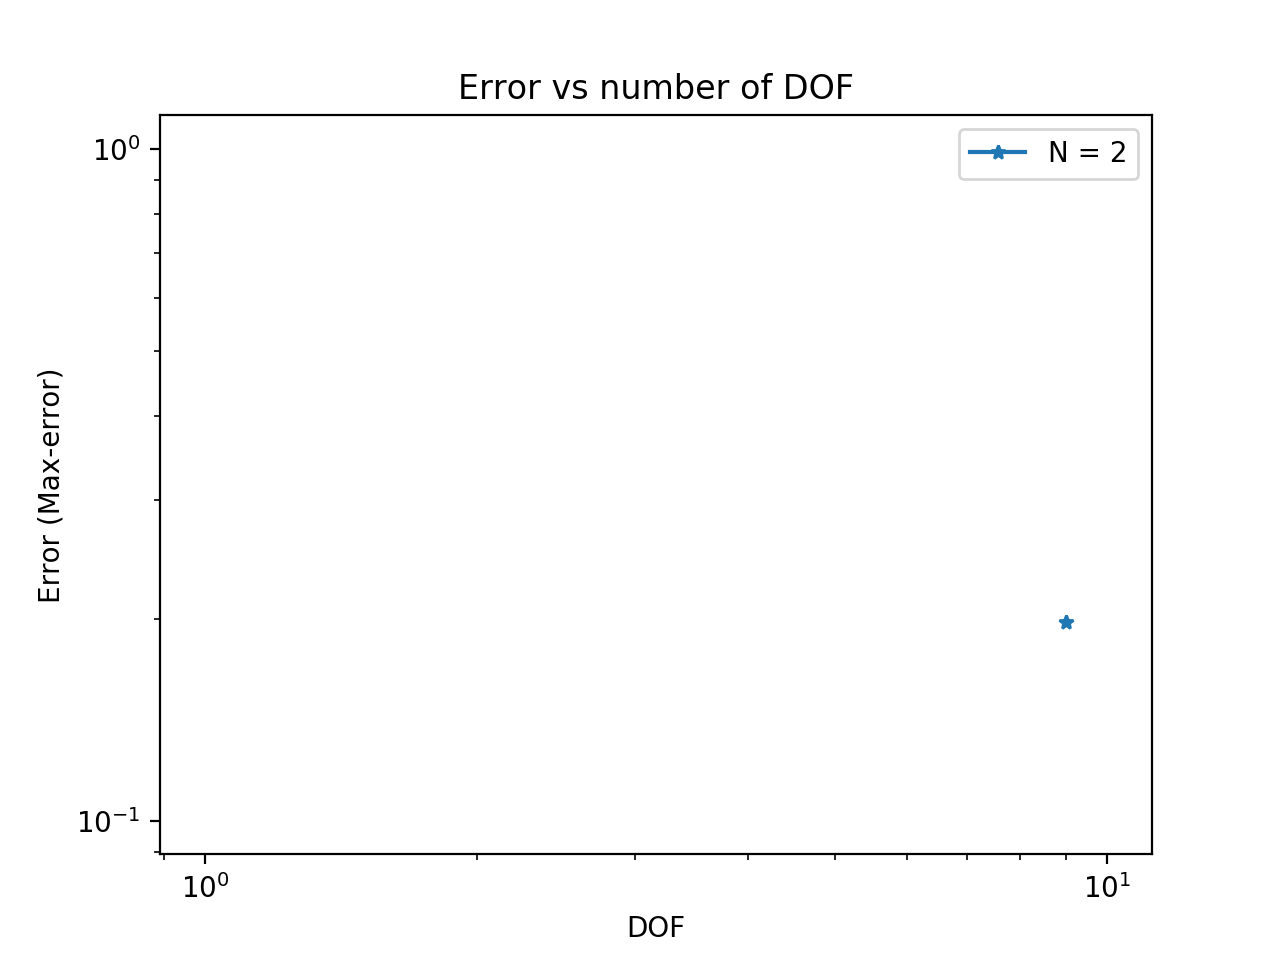

/Users/makopera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


In [7]:
import cg_graphics
figure(2)
clf()
P = []   
for e in error_list:
    N = e[0]
    Error = e[1]
    
    Np = NE*(N+1)
    loglog(Np, Error,'-*',markersize=5, label = 'N = {}'.format(N))
    
    p = polyfit(log(NE), log(Error),1)
    #print('N = {:d}, rate = {:f}'.format(N,p[0]))
    P.append(p[0])

xlabel('DOF')
ylabel('Error (Max-error)')
title('Error vs number of DOF')
#cg_graphics.set_xticks(NE*N)  # Create nice tick marks for NE
#grid(axis='both',linestyle='--')
legend()
show()   

In [13]:
for i in range(len(Order)):
    print('N = {:d}, rate = {:f}'.format(Order[i],P[i]))

N = 3, rate = -0.737611


<IPython.core.display.Javascript object>


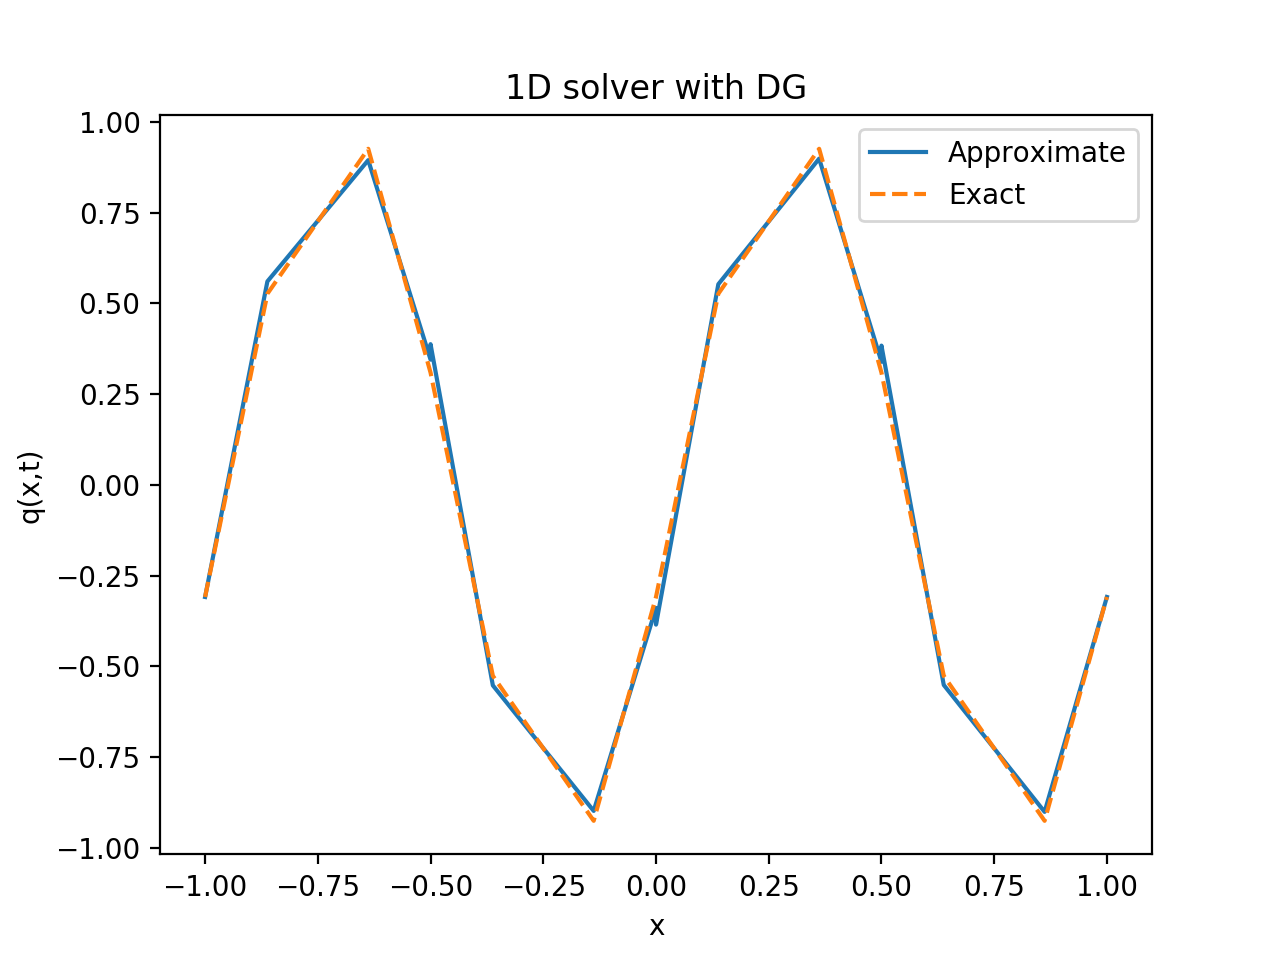

In [14]:
figure(3)
qex = qinit(x-u*t[Nt])
plot(x,q, label = 'Approximate')
plot(x,qex, '--', label='Exact')

title('1D solver with DG')
xlabel('x')
ylabel('q(x,t)')
legend()
show()